In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement/placement.csv
/kaggle/input/placementcsv/placement.csv


In [4]:
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('/kaggle/input/placementcsv/placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [35]:
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

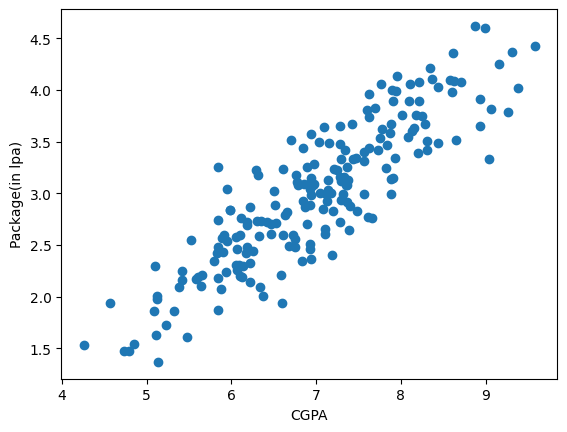

In [36]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [37]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
X_test[:10]

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [42]:
y_test[:10]

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
Name: package, dtype: float64

In [43]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package(in lpa)')

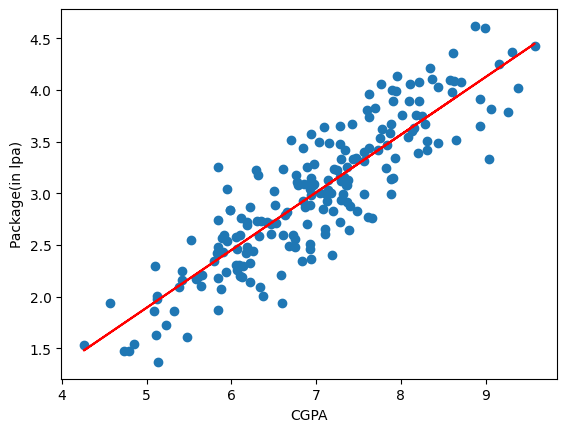

In [44]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [46]:
y_pred = lr.predict(X_test)
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [47]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [48]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495532


In [49]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.3482705171773162


In [50]:
r2 = r2_score(y_test,y_pred)
print("R2",r2)

R2 0.780730147510384


In [51]:
# Adjusted R2 score
X_test.shape
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [24]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.539633,3.26
1,5.12,0.743888,1.98
2,7.82,0.139343,3.25
3,7.42,0.309508,3.67
4,6.94,0.995969,3.57


Text(0, 0.5, 'Package(in lpa)')

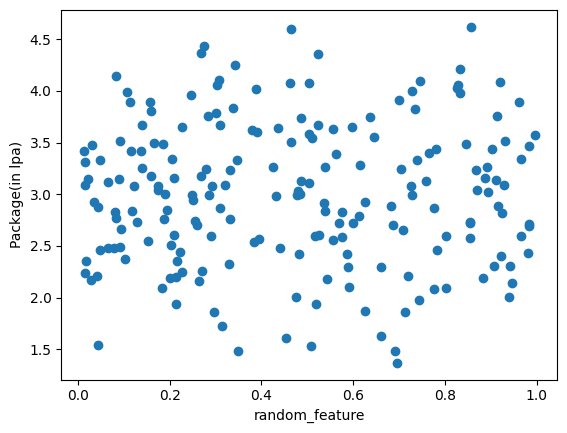

In [25]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [26]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test)
r2 = r2_score(y_test,y_pred)
print("MSE",r2)

MSE 0.786268871954888


In [28]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7747158380065036

In [29]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]
new_df2.sample(5)

,cgpa,iq,package
149,8.28,4.17,3.67
39,7.43,2.43,3.33
186,7.84,2.57,3.47
4,6.94,4.67,3.57
37,5.90,3.53,2.43


Text(0, 0.5, 'Package(in lpa)')

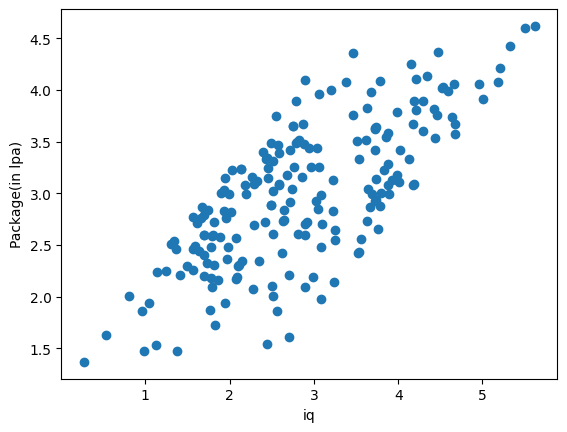

In [30]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [31]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8454277668263783


In [32]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8370725109791555